In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc import MCMC
import seaborn
import corner
import numpy as np
from parmed.topologyobjects import DihedralType
import simtk.unit as unit
import pymc 
from scipy import optimize

This notebook minimizes the sum of least squares of E_qm and E_mm

In [2]:
from torsionfit.toy_model import ToyModel

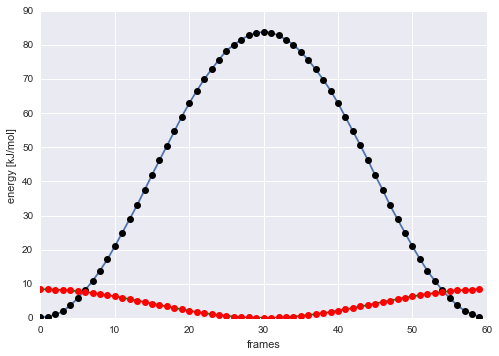

In [12]:
toy = ToyModel(true_value=DihedralType(10, 1, 180, 1, 1), initial_value=DihedralType(1, 1, 0, 1, 1), n_increments=30)
             #decouple_n=True)
#toy = ToyModel(n_increments=50, decouple_n=True)
#toy.scan_set.save_initial_mm(toy._param)
plt.plot(toy.synthetic_energy)
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='g')
plt.plot(toy.scan_set.initial_mm, 'ko', color='r')

In [66]:
def energy_1(variables):
    toy._param.dihedral_types['CG331', 'CG321', 'CG321', 'CG331'][0].phi_k = abs(variables[0])
    toy._param.dihedral_types['CG331', 'CG321', 'CG321', 'CG331'][0].phase = abs(variables[1])
    offset = pymc.Uniform('offset', lower=-1000, upper=1000, value=variables[2], observed=True)
    toy.scan_set.compute_energy(toy._param, offset=offset)
    return toy.scan_set.mm_energy
    

In [67]:
def residuals(variables):
    qm = toy.synthetic_energy._value
    mm = energy_1(variables)._value
    return np.sum((qm-mm)**2)

In [81]:
initial_guess = [10,20,1]
energy_1(initial_guess)
fit = optimize.minimize(residuals,initial_guess,method='Nelder-Mead')
print "The predicted parameters are", fit.x
print "error is", fit.fun
#residuals(initial_guess)

The predicted parameters are [  9.99854995e+00   1.79990881e+02   4.69973195e-02]
error is 0.62536850123


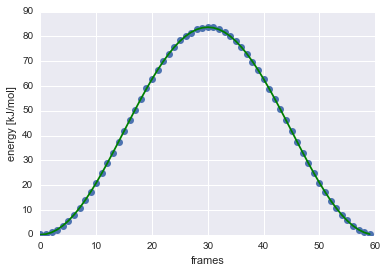

In [82]:
plt.clf()
#plt.plot(toy.synthetic_energy)
plt.plot(toy.synthetic_energy, 'o')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='g')
#plt.plot(toy.scan_set.initial_mm, 'ko', color='r')